## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


boston = datasets.load_boston()
X = pd.DataFrame(boston.data, columns = boston.feature_names)
y = pd.DataFrame(boston.target, columns = ['MEDV'])

In [86]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [87]:
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [89]:
regr_1 = DecisionTreeRegressor(max_depth=8)
regr_1.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=8)

In [90]:
mse1_train = regr_1.score(X_train, y_train)
mse1_test = regr_1.score(X_test, y_test)

template1 = "Na base treinamento, o MSE da árvore com profundidade={0} é: {1:.2f}"
template2 = "Na base teste, o MSE da árvore com profundidade={0} é: {1:.2f}"

print(template1.format(regr_1.get_depth(),mse1_train).replace(".",","))
print(template2.format(regr_1.get_depth(),mse1_test).replace(".",","))


Na base treinamento, o MSE da árvore com profundidade=8 é: 0,98
Na base teste, o MSE da árvore com profundidade=8 é: 0,75


### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [91]:
path = regr_1.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.00000000e+00, 5.64971751e-05, 5.64971751e-05, 6.35593220e-05,
        2.25988701e-04, 3.53107345e-04, 4.61393597e-04, 6.77966102e-04,
        6.92090395e-04, 6.92090395e-04, 7.62711864e-04, 1.41242938e-03,
        1.41242938e-03, 1.70903955e-03, 2.07627119e-03, 2.28813559e-03,
        2.88370998e-03, 2.94256121e-03, 3.05084746e-03, 3.17796610e-03,
        3.95951036e-03, 4.52448211e-03, 4.76694915e-03, 5.12711864e-03,
        6.15254237e-03, 6.92090395e-03, 7.47175141e-03, 7.68989328e-03,
        7.91431262e-03, 7.91902072e-03, 7.95668550e-03, 8.60909335e-03,
        9.18432203e-03, 9.64218456e-03, 9.79661017e-03, 1.10734463e-02,
        1.10746234e-02, 1.27120662e-02, 1.35969868e-02, 1.44632768e-02,
        1.53813559e-02, 1.59130571e-02, 1.90960452e-02, 2.35310734e-02,
        2.37570621e-02, 2.38265626e-02, 2.44067797e-02, 2.64500942e-02,
        2.65762712e-02, 2.71509282e-02, 2.71939736e-02, 2.92658730e-02,
        3.07793023e-02, 3.08898305e-02, 3.35111563

Text(0, 0.5, 'Impureza total das folhas')

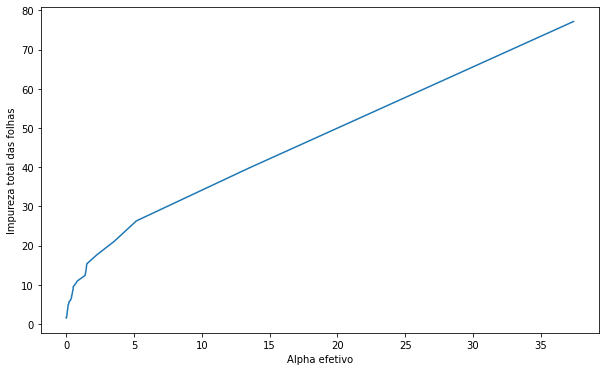

In [92]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [93]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [94]:
train_scores = [mean_squared_error(y_train , clf.predict(X_train)) for clf in clfs]
test_scores  = [mean_squared_error(y_test  , clf.predict(X_test )) for clf in clfs]


### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

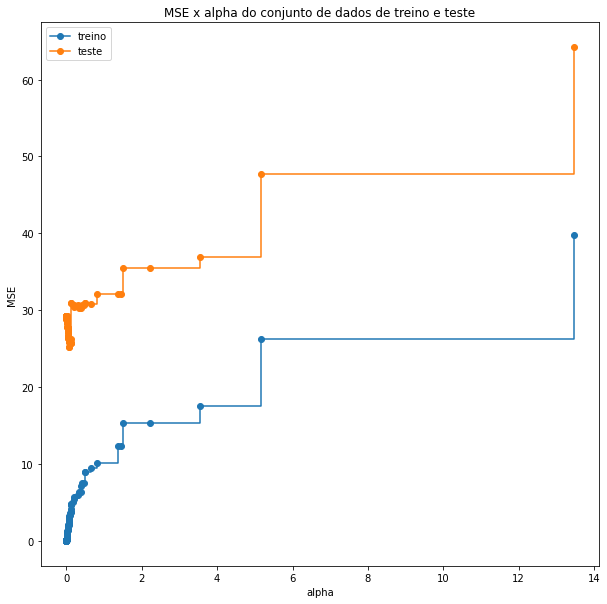

In [95]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [99]:
clf2 = DecisionTreeRegressor(random_state=0, ccp_alpha=0.2)
model = clf2.fit(X_train, y_train)

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [100]:
mse3 = model.score(X_train, y_train)

template = "O MSE da árvore com profundidade={0} é: {1:.2f}"

print(template.format(model.get_depth(),mse3).replace(".",","))


O MSE da árvore com profundidade=6 é: 0,93


### 7. Visualize esta árvore.

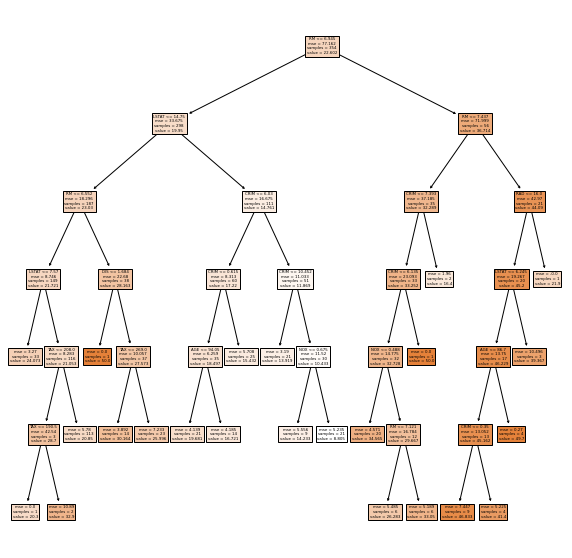

In [101]:
plt.rc('figure', figsize=(10, 10))
tp = tree.plot_tree(model, 
                    feature_names=X.columns,  
                    filled=True) 